# 2000-01-01 - Sprint Starting Analysis

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assumptions" data-toc-modified-id="Assumptions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Assumptions</a></span></li><li><span><a href="#Budget-Analysis" data-toc-modified-id="Budget-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Budget Analysis</a></span><ul class="toc-item"><li><span><a href="#Beginning-of-Sprint-Budget-Summary" data-toc-modified-id="Beginning-of-Sprint-Budget-Summary-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Beginning of Sprint Budget Summary</a></span></li></ul></li><li><span><a href="#Story-Point-Analysis" data-toc-modified-id="Story-Point-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Story Point Analysis</a></span><ul class="toc-item"><li><span><a href="#Sprint-User-Story-and-Point-Summary" data-toc-modified-id="Sprint-User-Story-and-Point-Summary-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Sprint User Story and Point Summary</a></span></li><li><span><a href="#Distribution-of-User-Stories-and-User-Story-Points-by-Type" data-toc-modified-id="Distribution-of-User-Stories-and-User-Story-Points-by-Type-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Distribution of User Stories and User Story Points by Type</a></span></li><li><span><a href="#Distribution-of-User-Story-Points-by-Size" data-toc-modified-id="Distribution-of-User-Story-Points-by-Size-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Distribution of User Story Points by Size</a></span></li><li><span><a href="#Least-and-Greatest-Story-Point-Items" data-toc-modified-id="Least-and-Greatest-Story-Point-Items-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Least and Greatest Story Point Items</a></span><ul class="toc-item"><li><span><a href="#User-Stories-Assigned-Zero-Points" data-toc-modified-id="User-Stories-Assigned-Zero-Points-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>User Stories Assigned Zero Points</a></span></li><li><span><a href="#User-Stories-Assigned-the-Greatest-Story-Point-Values" data-toc-modified-id="User-Stories-Assigned-the-Greatest-Story-Point-Values-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>User Stories Assigned the Greatest Story Point Values</a></span></li></ul></li><li><span><a href="#User-Story-Rollover-Distribution" data-toc-modified-id="User-Story-Rollover-Distribution-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>User Story Rollover Distribution</a></span></li><li><span><a href="#Most-Rolled-Over-User-Stories" data-toc-modified-id="Most-Rolled-Over-User-Stories-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Most Rolled Over User Stories</a></span></li><li><span><a href="#User-Story-Point-Statistics" data-toc-modified-id="User-Story-Point-Statistics-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>User Story Point Statistics</a></span><ul class="toc-item"><li><span><a href="#Descriptive-Statistics" data-toc-modified-id="Descriptive-Statistics-3.7.1"><span class="toc-item-num">3.7.1&nbsp;&nbsp;</span>Descriptive Statistics</a></span></li><li><span><a href="#Box-Plot" data-toc-modified-id="Box-Plot-3.7.2"><span class="toc-item-num">3.7.2&nbsp;&nbsp;</span>Box Plot</a></span></li></ul></li></ul></li></ul></div>

## Assumptions

* Labor costs are $50/hour
* A JIRA 'task' item is classified the same as a JIRA 'story' item
* There are six productive working hours in the day
* A sprint's duration is two weeks
* There are 60 hours of productive working time total in a sprint
* There are 10 story points per developer per sprint

In [1]:
### ETL ### 

In [19]:
## IMPORTS AND NOTEBOOK CONFIG ##

import pandas as pd
from pandas import set_option

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import numpy as np

import math

from IPython.core.display import display, HTML

%matplotlib inline

In [3]:
##  HELPER FUNCTIONS  ##

summary = pd.DataFrame()

# Helper getter function
def get(index, column = ''):
    if (column == ''):
        column = sprint
        
    return summary.loc[index, column]

# Helper setter function
def put(index, value, column = ''):  
    if (column == ''):
        column = sprint
        
    summary.loc[index, column] = value
    return summary.loc[index, column]


# Helper function to add values above the bar graph elements
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')
        

# Helper fuction to return hyperlink 
def makeStoryLink(val, url = 'http://example.com/browse/'):
    url = url + val
    return '<a href="{}">{}</a>'.format(url,val)

In [4]:
##  DEFINE VARIABLES  ##

# Define sprint label
sprint = '2000-01-01'

# Define summary container
summary = pd.DataFrame(index = [
    # These come from the velocity worksheet
    'laborCostPerHour',
    'hoursPerSprint',
    'pointsPerSprint',
    'totalResourceCount',
    'totalResourceHours',
    
    # Total number of jira items
    'totalStartingItemCount',
    # Total number of jira items by type
    'totalStartingStoryCount',
    'totalStartingSpikeCount',
    'totalStartingBugCount',
    # Number of items by type / total number of items
    'totalStartingStoryCountRatio',
    'totalStartingSpikeCountRatio',
    'totalStartingBugCountRatio',
    
    # Total number of story points
    'totalStartingItemPoints',
    # Total number of story points by type
    'totalStartingStoryPoints',
    'totalStartingSpikePoints',
    'totalStartingBugPoints',
    # Number of story points by type / total number of story points
    'totalStartingStoryPointsRatio',
    'totalStartingSpikePointsRatio',
    'totalStartingBugPointsRatio',
    
    # Descriptive stats on story points
    'totalStartingMean',
    'totalStartingStd',
    'totalStartingMin',
    'totalStartingMax',
    
    ### Budgeting items
    # Budget at complete
    'BAC',
    # Stories less bugs
    'APV', 
    'APVRatio',
    # Total costs for this sprint per story point
    'totalStartingCostPerPoint',
    # Cost of story points by type
    'totalStartingStoryValue',
    'totalStartingSpikeValue',
    'totalStartingBugValue',
    # Cost of story points by type / total cost all story points
    'totalStartingStoryCostRatio',
    'totalStartingSpikeCostRatio',
    'totalStartingBugCostRatio',
     
    # Sprint roll over stats
    'totalStartingRolloverCount',
    'rollOverCountMean',
    'rollOverCountStd',
    'rollOverCountMin',
    'rollOverCountMax',
    
    # Warning limit for number of times a story point can be rolled over from sprint to sprint
    'rollOverThreshold',
    
    # Warning limit for story point size
    'storyPointSizeWarningThreshold'
])

pass;

In [29]:
##  LOAD THE DATA AND SET VALUES  ##

# Init the summary container
summary[sprint] = np.nan

# Load the beginning sprint data
df = pd.read_csv('./' + sprint + '-anon.csv')

# Define sprint values as outlined in our assumptions section 
# above for the calculations below
put('laborCostPerHour', 50)
put('hoursPerSprint', 60)
put('pointsPerSprint', 10)
put('rollOverThreshold', 2)
put ('storyPointSizeWarningThreshold', 8)
put('totalResourceCount', 10)

pass;

In [17]:
##  DATA PROCESSING AND FEATURE CREATION  ##

# Calulate total resource hours
put('totalResourceHours', get('totalResourceCount') * get('hoursPerSprint'))

# Cacluate cost per story point
put('totalStartingCostPerPoint', 
    (get('hoursPerSprint') / get('pointsPerSprint') ) 
    * get('laborCostPerHour'))

# Record total number of JIRA items in the sprint
put('totalStartingItemCount', df.shape[0])

# Record total starting story points in the sprint
put('totalStartingItemPoints', df['Story Points'].sum());

# Merge Tasks and Stories
df.loc[df.Type == 'Task', 'Type'] = 'Story'

# Add $ values to each item
df['Cost'] = (df['Story Points'] * get('totalStartingCostPerPoint'))

# BAC and cost ratios for each item
put('BAC', np.sum(df['Cost']))
df['Cost Ratio'] = df['Cost'].values / get('BAC') * 100

# Story point ratio
df['Story Point Ratio'] = df['Story Points'].values / get('totalStartingItemPoints') * 100

# Total number of items to item type ratios
for item in ['Story', 'Spike', 'Bug']:
    put('totalStarting'+item+'CountRatio', df.groupby('Type').size()[item]
       / get('totalStartingItemCount') * 100)  

# Desc. stats on story points
stats = df['Story Points'].describe()
for stat in ['mean', 'std', 'min', 'max']:
    put('totalStarting' + stat.capitalize(), stats[stat])

# Type count and story point sums
for item in ['Story', 'Spike', 'Bug']:
    put('totalStarting' + item + 'Count', df.groupby('Type').size()[item])
    put('totalStarting' + item + 'Points', df.groupby('Type')['Story Points'].sum()[item])

# Type story point ratios
for item in ['Story', 'Spike', 'Bug']:
    put('totalStarting' + item + 'PointsRatio', df.groupby('Type')['Story Points'].size()[item] 
        / get('totalStartingItemPoints') * 100)

# Type values
for item in ['Story', 'Spike', 'Bug']:
    put('totalStarting'+item+'Value', 
        (df.groupby('Type')[['Cost']].sum()).loc[item][0])

    
# Type cost ratios
for item in ['Story', 'Spike', 'Bug']:
    put('totalStarting'+item+'CostRatio', 
        (df.groupby('Type')[['Cost Ratio']].sum()).loc[item][0])
    

# Sprint roll overs
rollCount = [len(x.split(',')) - 1 for x in df['Sprint'].values ]
df['rollOverCount'] = [len(x.split(',')) - 1 for x in df['Sprint'].values ]

put('totalStartingRolloverCount', df[ df['rollOverCount'] > 0].groupby('rollOverCount').size().sum())

stats = df['rollOverCount'].describe()
for stat in ['mean', 'std', 'min', 'max']:
    put('rollOverCount' + stat.capitalize(), stats[stat])

# Calculate APV and APAV ratio
put('APV', get('totalStartingStoryValue') + get('totalStartingSpikeValue'))
put('APVRatio', (get('APV')/get('BAC'))*100)

# Record features for future time series reporting and analysis
# summary.to_csv('./' + sprint +'-etc.csv', )

pass;

# Uncomment to view the summary dataframe object
#summary

#### <br/>

## Budget Analysis

<br/>

### Beginning of Sprint Budget Summary

In [21]:
pd.set_option('precision', 2)

budget = pd.DataFrame( columns = ['Budget Item', 'Total', 'Ratio', 'Item Count'])
row = [
    [
        'Planned Development', 
        '${:,.2f}'.format(get('APV')), 
        '{:,.2f}%'.format(get('APVRatio')), 
        get('totalStartingStoryCount') + get('totalStartingSpikeCount')
    ]
    ,[
        'Planned Tech Debt / Support', 
        '${:,.2f}'.format(get('totalStartingBugValue')), 
        '{:,.2f}%'.format(get('totalStartingBugCostRatio')), 
        get('totalStartingBugCount')
    ]
    ,[
        'Total Sprint Budget', 
        '${:,.2f}'.format(get('BAC')), 
        '100%', 
        get('totalStartingStoryCount') + get('totalStartingSpikeCount') + get('totalStartingBugCount')
    ]
    ,['', '', '', '']
    ,['Cost per Story Point', '${:,.2f}'.format(get('totalStartingCostPerPoint')), '', '']
]

for r in row:
    budget.loc[len(budget)] = r

display(HTML(budget.to_html(index=False)))

Budget Item,Total,Ratio,Item Count
Planned Development,"$35,700.00",74.38%,21
Planned Tech Debt / Support,"$12,300.00",25.62%,12
Total Sprint Budget,"$48,000.00",100%,33
,,,
Cost per Story Point,$300.00,,


<br/>

## Story Point Analysis

<br/>

### Sprint User Story and Point Summary

<br/>

In [20]:
pd.set_option('precision', 0)

items = pd.DataFrame( columns = ['Item', 'Value'])
rows = [
    ['Total Number of Stories', get('totalStartingItemCount')]
    ,['Total Number of Story Points', get('totalStartingItemPoints')]
]

for r in rows:
    items.loc[len(items)] = r

display(HTML(items.to_html(index=False)))

Item,Value
Total Number of Stories,33
Total Number of Story Points,160


<br/>

### Distribution of User Stories and User Story Points by Type

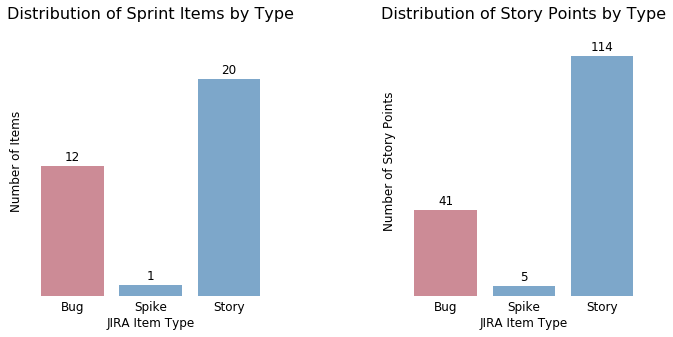

In [22]:
# Setup params for displaying the two subplots
plt.rcParams.update({'font.size': 12})
plt.figure(num=None, figsize=(11, 5))
plt.subplots_adjust(wspace=.55)


####
# Distribution of Sprint Items by Type graph

# Define plotting area for the figure
ax = plt.subplot(1, 2, 1)

# Instantiate and configure the graph
x = np.arange(len(df.groupby('Type')['Key']))
y = list(df.groupby('Type')['Key'].count())
ax.set_ylim([0,np.max(y) + 5])


# Labels, ticks, and titles
plt.xlabel('JIRA Item Type')
plt.ylabel('Number of Items')
plt.title('Distribution of Sprint Items by Type', fontsize=16)

xLabels = df.groupby('Type')['Key'].count().index
plt.xticks(x, xLabels)
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis=u'both', which=u'both',length=0)

# Create the bar graph
bars = plt.bar(x, y, color = 'steelblue', alpha=0.7)
plt.bar(x[0], y[0], color = 'lightcoral', alpha = 0.7)

# Draw the value for each bar above it
autolabel(bars, plt.gca())

# Remove figure outline
plt.box(False)


####
# Distribution of Story Points by Type graph

# Define plotting area
ax = plt.subplot(1, 2, 2)

# Instantiate and configure the graph
x = np.arange(len(df.groupby('Type')['Story Points']))
y = list(df.groupby('Type')['Story Points'].sum())
ax.set_ylim([0,np.max(y) + 15])

# Labels, ticks, and titles
plt.xlabel('JIRA Item Type')
plt.ylabel('Number of Story Points')
plt.title('Distribution of Story Points by Type', fontsize = 16)

ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis = u'both', which = u'both',length = 0)
xLabels = df.groupby('Type')['Story Points'].sum().index
plt.xticks(x, xLabels);

# Create the bar graph
bars = plt.bar(x, y, color = 'steelblue', alpha=0.7)
plt.bar(x[0], y[0], color = 'lightcoral', alpha = 0.7)

# Draw the value for each bar above it
autolabel(bars, plt.gca())

# Remove figure outline
plt.box(False)

<br/>

### Distribution of User Story Points by Size

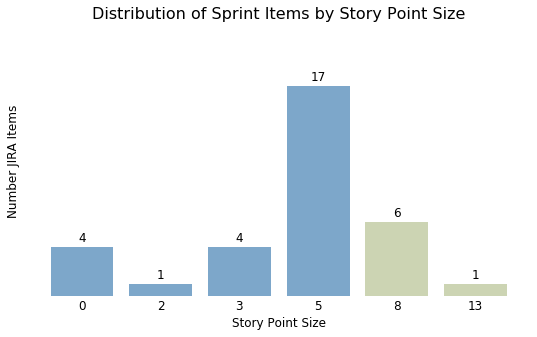

In [23]:
# Distribution of Sprint Items by Story Point Size graph

# Gather data set for the graph
tmp = df.groupby('Story Points').size()

# Graph settings
plt.figure(num=None, figsize=(9, 5))
plt.subplots_adjust(wspace = .75)

# Define plotting area
ax = plt.subplot(1, 1, 1)

# Instantiate and configure the graph
x = np.arange(len(list(tmp.index)))
y = tmp.values
ax.set_ylim([0,np.max(y) + 5])

# Labels, ticks, and titles
plt.xlabel('Story Point Size')
plt.ylabel('Number JIRA Items')
plt.title('Distribution of Sprint Items by Story Point Size', fontsize = 16)

ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis = u'both', which = u'both',length = 0)
xLabels = list(tmp.index)
plt.xticks(x, xLabels);

# Create the bar graph
bars = plt.bar(x, y, color = 'steelblue', alpha = 0.7)

# Draw the value for each bar above it
autolabel(bars, plt.gca())

# Remove figure outline
plt.box(False)

# Apply coloring on bars based on story point value
mask = tmp.index >= get('storyPointSizeWarningThreshold')
plt.bar(x[mask], y[mask], color = 'palegoldenrod', alpha = 0.7);

### Least and Greatest Story Point Items

<br/>

#### User Stories Assigned Zero Points

In [24]:
(
    df.loc[df['Story Points'] == summary.loc['totalStartingMin'][0]]
    [['Key', 'Summary', 'Assignee', 'Story Points']]
    .style.format({'Key': makeStoryLink})
).hide_index()

Key,Summary,Assignee,Story Points
P1-369,Donec lacus magnis ornare tincidunt quisque ipsum ve dictumst mauris enim blandit.,Ms. Yellow,0
P1-291,Metus massa.,Mr. Blue,0
P3-5798,Purus class.,Mr. Green,0
P3-5748,Purus lorem mattis maecenas parturient luctus at.,Mr. Tan,0


<br/>

#### User Stories Assigned the Greatest Story Point Values

In [25]:
(
    df.loc[df['Story Points'] >= get('storyPointSizeWarningThreshold')]
        .sort_values(['Story Points', 'Key'], ascending = False)
    [['Key', 'Summary', 'Assignee', 'Story Points']]
    .style.format({'Key': makeStoryLink})
).hide_index()

Key,Summary,Assignee,Story Points
P3-5803,Class justo semper.,Ms. Aqua,13
P3-5838,Ipsum porta cursus pellentesque pretium metus.,Mr. Green,8
P3-5822,Justo velit neque.,Mr. Violet,8
P3-5820,Morbi massa.,Ms. Yellow,8
P3-5662,Justo netus hymenaeos sem morbi commodo suscipit mi fames condimentum dictumst ante est.,Mr. Violet,8
P2-239,Justo porta rutrum at auctor justo mi purus mus vitae pretium semper magna nibh cum per viverra tellus.,Ms. Purple,8
P1-387,Vitae magna auctor duis eget cubilia.,Mr. Blue,8


<br/>

<br/>

### User Story Rollover Distribution

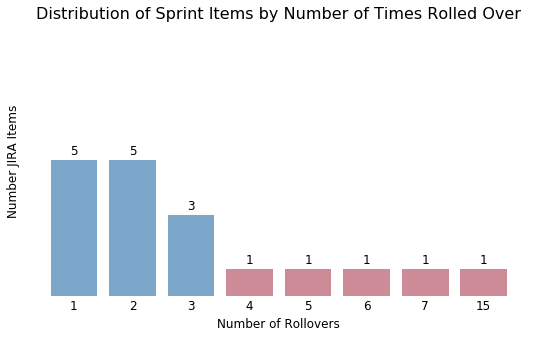

In [26]:
# Distribution of Sprint Items by Rollovers graph

# Gather data set for the graph
tmp = df[df['rollOverCount'] > 0].groupby('rollOverCount').size()

# Graph settings
plt.rcParams.update({'font.size': 12})
plt.figure(num=None, figsize=(9, 5))
plt.subplots_adjust(wspace = .75)

# Define plotting area
ax = plt.subplot(1, 1, 1)

# Instantiate and configure the graph
y = tmp.values
x = np.arange(len(list(tmp.index)))
ax.set_ylim([0,np.max(y) + 5])

# Labels, ticks, and titles
plt.xlabel('Number of Rollovers')
plt.ylabel('Number JIRA Items')
plt.title('Distribution of Sprint Items by Number of Times Rolled Over', fontsize = 16)

xLabels = list(tmp.index)
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis = u'both', which = u'both',length = 0)
plt.xticks(x, xLabels);

# Create the bar graph
bars = plt.bar(x, y, color = 'steelblue', alpha = 0.7)

# Remove figure outline
plt.box(False)

# Draw the value for each bar above it
autolabel(bars, plt.gca())

# Apply coloring on bars based on graph values
mask = x > get('rollOverThreshold')
plt.bar(x[mask], y[mask], color="lightcoral", alpha = .7);

<br/>

### Most Rolled Over User Stories

In [27]:
(
    df.loc[df['rollOverCount'] > get('rollOverThreshold')+1]
    [['Key', 'Summary', 'Assignee', 'Story Points', 'rollOverCount']]
    .sort_values(['rollOverCount'], ascending = False)
    .style.format({'Key': makeStoryLink})
).hide_index()

Key,Summary,Assignee,Story Points,rollOverCount
P2-8,Neque felis ante a netus ve mauris eu taciti senectus felis facilisis.,Mr. Tan,5,15
P3-5748,Purus lorem mattis maecenas parturient luctus at.,Mr. Tan,0,7
P3-5662,Justo netus hymenaeos sem morbi commodo suscipit mi fames condimentum dictumst ante est.,Mr. Violet,8,6
P3-5677,Justo lorem ligula.,nan,5,5
P3-5774,Risus massa lectus in ornare est diam vehicula sem cursus.,Mr. Tan,5,4


<br/>


### User Story Point Statistics

<br/>

#### Descriptive Statistics

In [15]:
set_option('precision', 1)
df['Story Points'].describe()

count    33.0
mean      4.8
std       2.8
min       0.0
25%       3.0
50%       5.0
75%       5.0
max      13.0
Name: Story Points, dtype: float64

<br/>

#### Box Plot

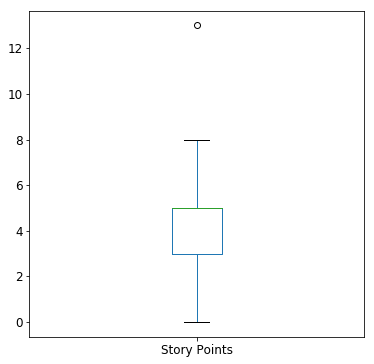

In [16]:
df['Story Points'].plot(kind="box", figsize = (6,6))
plt.show()

<br/>